# Extract relevant data

In [1]:
import csv,copy

with open('./dagstuhl-15512-argquality-corpus-v2/dagstuhl-15512-argquality-corpus-annotated.csv','r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter='\t')
    reader_list = []
    #print(list(csv_reader))
    
    for line in csv_reader:
        reader_list.append(dict(line))
        
#print(*reader_list[0:4], sep='\n\n')
#print(reader_list[0].keys())

res = []

for row in reader_list:
    res.append(dict((k, row[k]) for k in ['#id','issue','stance','argumentative','overall quality','effectiveness','argument','emotional appeal'] if k in row))
    
#print(res[0]['argumentative'])

count_of_non_arguments = 0

for i in range(len(res)):
    if res[i]['argumentative']=='n':
        #print(res[i])
        count_of_non_arguments = count_of_non_arguments + 1
        
#print(count_of_non_arguments) #25 'n'
#print(float(res[i]['effectiveness'][0])) #some empty string present

final_data = []
non_argumentive_data = []  #having 'argumentative'=['n','n','n'] 
not_strong_argumentative = []
strong_argumentative = []

def str_to_float(temp_str):
    if temp_str=='':
        return (0.0)
    else:
        return (float(temp_str))

for i in range(len(res)):    
    if i%3==0:
        temp_argumentative = []
        temp_argumentative.append(res[i]['argumentative'])
        temp_argumentative.append(res[i+1]['argumentative'])
        temp_argumentative.append(res[i+2]['argumentative'])
        
        temp_overall_quality = []
        temp_overall_quality.append(str_to_float(res[i]['overall quality'][:1]))
        temp_overall_quality.append(str_to_float(res[i+1]['overall quality'][:1]))
        temp_overall_quality.append(str_to_float(res[i+2]['overall quality'][:1]))
        
        temp_effectiveness = []
        temp_effectiveness.append(str_to_float(res[i]['effectiveness'][:1]))
        temp_effectiveness.append(str_to_float(res[i+1]['effectiveness'][:1]))
        temp_effectiveness.append(str_to_float(res[i+2]['effectiveness'][:1]))
        
        temp_emotional_appeal = []
        temp_emotional_appeal.append(str_to_float(res[i]['emotional appeal'][:1]))
        temp_emotional_appeal.append(str_to_float(res[i+1]['emotional appeal'][:1]))
        temp_emotional_appeal.append(str_to_float(res[i+2]['emotional appeal'][:1]))
        
        res[i]['argumentative']=temp_argumentative
        res[i]['overall quality']=temp_overall_quality
        res[i]['effectiveness']=temp_effectiveness
        res[i]['emotional appeal']=temp_emotional_appeal
        
        if temp_argumentative==['y','y','y']:
            final_data.append(res[i])
#         if temp_argumentative==['n','n','n']:
#             non_argumentive_data.append(res[i])
#         elif temp_argumentative==['y','n','n'] or temp_argumentative==['n','y','n'] or temp_argumentative==['n','n','y']:
#             not_strong_argumentative.append(res[i])
#         elif temp_argumentative==['y','y','n'] or temp_argumentative==['n','y','y'] or temp_argumentative==['n','y','y']:
#             strong_argumentative.append(res[i])
#         else:
#             final_data.append(res[i])

# print(final_data[0:3])
# print(str(len(non_argumentive_data)) + " non argumentative data")
# print(str(not_strong_argumentative) + " not_strong_argumentative")
# print(str(len(strong_argumentative)) + " strong_argumentative")

#print(*final_data[0:3], sep="\n\n")
#print(*non_argumentive_data, sep="\n\n")

import json

for i in range(len(final_data)):
    final_data[i]['id'] = final_data[i].pop('#id')
    final_data[i]['issue'] = final_data[i].pop('issue')
    final_data[i]['stance_on_topic'] = final_data[i].pop('stance')
    final_data[i]['argumentative'] = final_data[i].pop('argumentative')
    final_data[i]['argument_quality_scores'] = final_data[i].pop('overall quality')
    final_data[i]['effectiveness_scores'] = final_data[i].pop('effectiveness')
    final_data[i]['emotional_appeal_scores'] = final_data[i].pop('emotional appeal')
    final_data[i]['text'] = final_data[i].pop('argument')

final_wo_emotionalappeal = copy.deepcopy(final_data)

for element in final_wo_emotionalappeal:
    element.pop('emotional_appeal_scores')
    
print(*final_wo_emotionalappeal[0:2], sep='\n\n')
print(*final_data[0:2], sep='\n\n')
    
with open('final_output.json', 'w', encoding='utf-8') as f:
    json.dump(final_wo_emotionalappeal, f, ensure_ascii=False, indent=2)
        
# argument id
# issue
# stance on the issue
# argumentativeness annotations (from all
# three annotators)
# quality scores (from all three annotators)
# effectiveness scores (from all three
# annotators)
# argument text

{'id': 'arg219250', 'issue': 'ban-plastic-water-bottles', 'stance_on_topic': 'no-bad-for-the-economy', 'argumentative': ['y', 'y', 'y'], 'argument_quality_scores': [1.0, 1.0, 2.0], 'effectiveness_scores': [1.0, 1.0, 2.0], 'text': 'it is true that bottled water is a waste, but bottles can be reused!'}

{'id': 'arg219293', 'issue': 'ban-plastic-water-bottles', 'stance_on_topic': 'no-bad-for-the-economy', 'argumentative': ['y', 'y', 'y'], 'argument_quality_scores': [2.0, 1.0, 2.0], 'effectiveness_scores': [2.0, 1.0, 2.0], 'text': 'Most Americans on average recycle 86-88% of there bottle waters. That is more than half! So stop complaining that we dont recycle because we do! <br/> http://www.treehugger.com/culture/23-percent-of-americans-donatmt-recycle.html'}
{'id': 'arg219250', 'issue': 'ban-plastic-water-bottles', 'stance_on_topic': 'no-bad-for-the-economy', 'argumentative': ['y', 'y', 'y'], 'argument_quality_scores': [1.0, 1.0, 2.0], 'effectiveness_scores': [1.0, 1.0, 2.0], 'emotional_a

In [19]:
import os
#path_of_the_directory = r'E:\gre pdf\germany_details\Uni-assist LOM\paderborn admit\sem1\Computational Argumentation\assignment1\dagstuhl-15512-argquality-corpus-v2\dagstuhl-15512-argquality-corpus-annotated-xmi'
path_of_the_directory = 'E:\dagstuhl-15512-argquality-corpus-annotated-xmi'

# for files in os.listdir(path_of_the_directory):
#     if os.path.isdir(os.path.join(path_of_the_directory,files)):
#         print(files)

#this giving only 13 issues but 16 issues are present
# for filename in os.listdir(path_of_the_directory):
#     f = os.path.join(path_of_the_directory,filename)
#     #os.path,isfile(f)
#     if os.path.isdir(f):
#         print(f[186:])

#why this is giving error & can't find path
count = 0
object = os.scandir(path_of_the_directory)
for n in object :
    if n.is_dir():
        f = os.path.join(path_of_the_directory,n.name)
        #print(f)
        obj1 = os.scandir(f)
        #print(obj1)
        for stance in obj1:
            if stance.is_dir():
                s = os.path.join(f,stance.name)
                #print(s[50:])
                obj2 = os.scandir(s)
                for args in obj2:
                    if args.is_file():
                        a = os.path.join(s, args.name)
                        count = count + 1
                        #print(a[50:])
object.close()
print(count)

304


https://www.pythonpool.com/python-loop-through-files-in-directory/

# Statistics

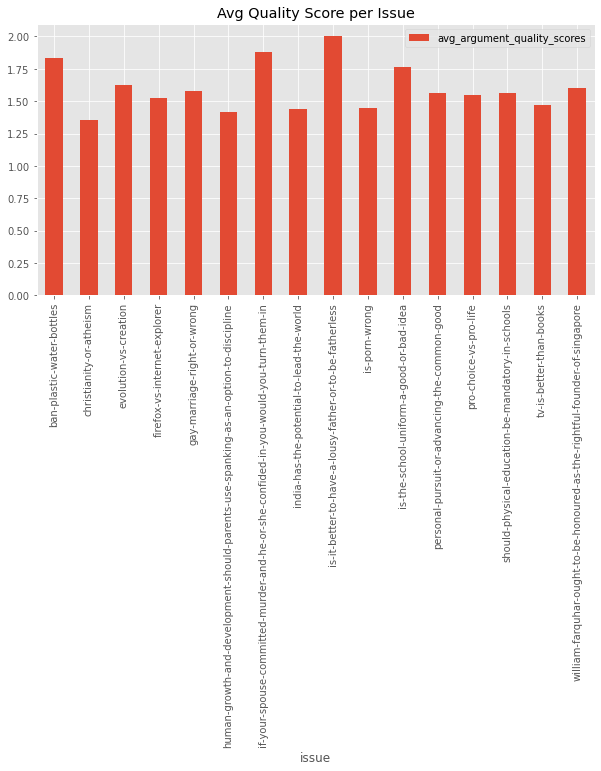

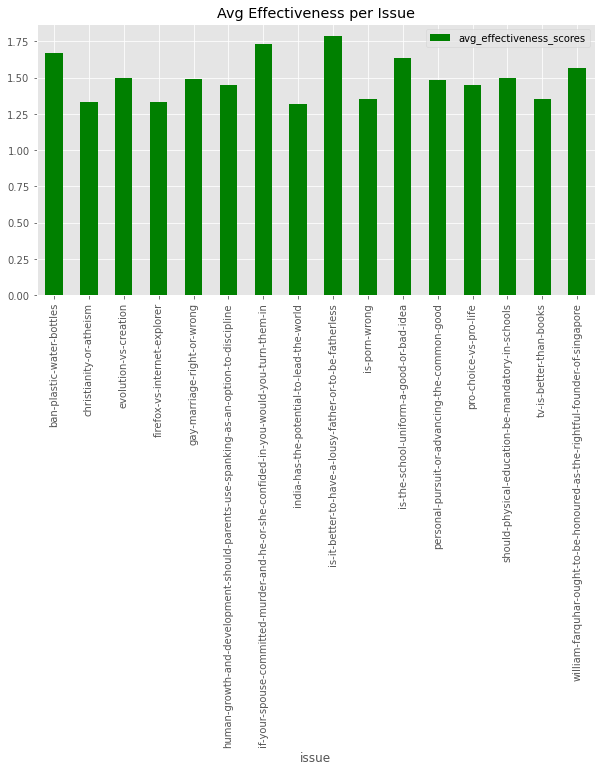

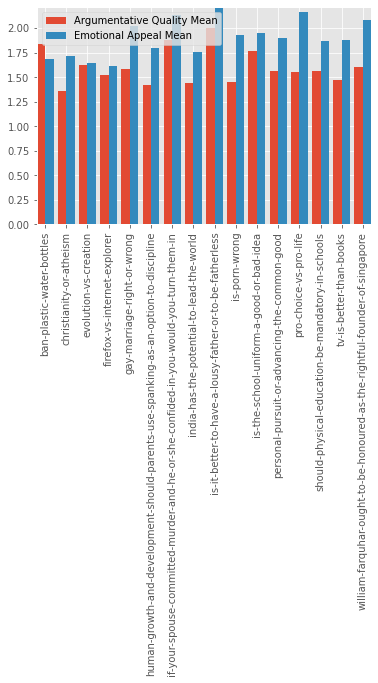

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

df = pd.DataFrame(final_data)

for i in range(len(df)) :
    df.loc[i,'avg_argument_quality_scores']= (df.loc[i, "argument_quality_scores"][0] + df.loc[i, "argument_quality_scores"][1] + df.loc[i, "argument_quality_scores"][2])/3
    df.loc[i,'avg_effectiveness_scores']= (df.loc[i, "effectiveness_scores"][0] + df.loc[i, "effectiveness_scores"][1] + df.loc[i, "effectiveness_scores"][2])/3
    df.loc[i,'avg_emotional_appeal_scores']= (df.loc[i, "emotional_appeal_scores"][0] + df.loc[i, "emotional_appeal_scores"][1] + df.loc[i, "emotional_appeal_scores"][2])/3

df_issues_effectivescore = df[['issue', 'avg_argument_quality_scores']]  
df_grpbyissue_quality = df_issues_effectivescore.groupby(["issue"]).mean()
df_grpbyissue_quality.plot(figsize=(10, 5), kind='bar',title='Avg Quality Score per Issue',grid=True)
plt.xticks(rotation = 90)
plt.show()

df_issues_qualityscores = df[['issue', 'avg_effectiveness_scores']]  
df_grpbyissue_effectiveness = df_issues_qualityscores.groupby(["issue"]).mean()
df_grpbyissue_effectiveness.plot(figsize=(10, 5), kind='bar', color='g',title='Avg Effectiveness per Issue',grid=True)
plt.xticks(rotation = 90)
plt.show()

scores = ['avg_argument_quality_scores','avg_emotional_appeal_scores']
dataset = df.groupby('issue')[scores].mean()

indx = np.arange(len(scores))
score_label = np.arange(0,150000 , 500)

topics = df.issue.unique()
argumentative_quality_mean = list(dataset['avg_argument_quality_scores'])
emotional_appeal_mean = list(dataset['avg_emotional_appeal_scores'])
x_axis = np.arange(len(topics))

# Multi bar Chart
plt.bar(x_axis -0.2, argumentative_quality_mean, width=0.4, label = 'Argumentative Quality Mean', align='center')
plt.bar(x_axis +0.2, emotional_appeal_mean, width=0.4, label = 'Emotional Appeal Mean', align='center')

plt.plot(kind ='bar', figsize=(15, 10), title='Argumentative Quality VS Emotional Appeal',grid=True)
plt.autoscale(tight=True)
# Xticks
plt.xticks(x_axis, topics, rotation=90)
# Add legend
plt.legend()
plt.show()


In [352]:
""" 
{'annotator': '1', 'argumentative': 'y', 'overall quality': '1 (Low)', 'local acceptability': '1 (Low)',
'appropriateness': '1 (Low)', 'arrangement': '1 (Low)', 'clarity': '2 (Average)', 'cogency': '1 (Low)', 'effectiveness': '1 (Low)',
'global acceptability': '1 (Low)', 'global relevance': '1 (Low)', 'global sufficiency': '1 (Low)', 'reasonableness': '1 (Low)',
'local relevance': '1 (Low)', 'credibility': '1 (Low)', 'emotional appeal': '1 (Low)', 'sufficiency': '1 (Low)',
'argument': 'it is true that bottled water is a waste, but bottles can be reused!', '#id': 'arg219250',
'issue': 'ban-plastic-water-bottles', 'stance': 'no-bad-for-the-economy'}
"""
# over quality, effectiveness > 80% or something by constant line vs scatter plot
# extra_strong(309) vs strong vs weak vs very_weak(4)

res_for_stats = []
final_res_for_stats = []

for row in reader_list:
    res_for_stats.append(dict((k, row[k]) for k in row))
    
# print(res_for_stats[0])

x_stance = []
y_avg_effectiveness = []

for i in range(len(res_for_stats)):    
    if i%3==0:
        temp_argumentative = []
        temp_argumentative.append(res_for_stats[i]['argumentative'])
        temp_argumentative.append(res_for_stats[i+1]['argumentative'])
        temp_argumentative.append(res_for_stats[i+2]['argumentative'])
        
        temp_overall_quality = []
        temp_overall_quality.append(str_to_float(res_for_stats[i]['overall quality'][:1]))
        temp_overall_quality.append(str_to_float(res_for_stats[i+1]['overall quality'][:1]))
        temp_overall_quality.append(str_to_float(res_for_stats[i+2]['overall quality'][:1]))
        
        temp_local_acceptability = []
        temp_local_acceptability.append(str_to_float(res_for_stats[i]['local acceptability'][:1]))
        temp_local_acceptability.append(str_to_float(res_for_stats[i+1]['local acceptability'][:1]))
        temp_local_acceptability.append(str_to_float(res_for_stats[i+2]['local acceptability'][:1]))
        
        temp_appropriateness = []
        temp_appropriateness.append(str_to_float(res_for_stats[i]['appropriateness'][:1]))
        temp_appropriateness.append(str_to_float(res_for_stats[i+1]['appropriateness'][:1]))
        temp_appropriateness.append(str_to_float(res_for_stats[i+2]['appropriateness'][:1]))
        
        temp_arrangement = []
        temp_arrangement.append(str_to_float(res_for_stats[i]['arrangement'][:1]))
        temp_arrangement.append(str_to_float(res_for_stats[i+1]['arrangement'][:1]))
        temp_arrangement.append(str_to_float(res_for_stats[i+2]['arrangement'][:1]))
        
        temp_clarity = []
        temp_clarity.append(str_to_float(res_for_stats[i]['clarity'][:1]))
        temp_clarity.append(str_to_float(res_for_stats[i+1]['clarity'][:1]))
        temp_clarity.append(str_to_float(res_for_stats[i+2]['clarity'][:1]))
        
        temp_cogency = []
        temp_cogency.append(str_to_float(res_for_stats[i]['cogency'][:1]))
        temp_cogency.append(str_to_float(res_for_stats[i+1]['cogency'][:1]))
        temp_cogency.append(str_to_float(res_for_stats[i+2]['cogency'][:1]))
        
        temp_effectiveness = []
        temp_effectiveness.append(str_to_float(res_for_stats[i]['effectiveness'][:1]))
        temp_effectiveness.append(str_to_float(res_for_stats[i+1]['effectiveness'][:1]))
        temp_effectiveness.append(str_to_float(res_for_stats[i+2]['effectiveness'][:1]))
        avg_effectiveness = sum(k for k in temp_effectiveness)/len(temp_effectiveness)
        x_stance.append(res_for_stats[i]['stance'])
        y_avg_effectiveness.append(avg_effectiveness)
        
        temp_global_acceptability = []
        temp_global_acceptability.append(str_to_float(res_for_stats[i]['global acceptability'][:1]))
        temp_global_acceptability.append(str_to_float(res_for_stats[i+1]['global acceptability'][:1]))
        temp_global_acceptability.append(str_to_float(res_for_stats[i+2]['global acceptability'][:1]))
        
        temp_global_relevance = []
        temp_global_relevance.append(str_to_float(res_for_stats[i]['global relevance'][:1]))
        temp_global_relevance.append(str_to_float(res_for_stats[i+1]['global relevance'][:1]))
        #getting error in this line only, maybe one entry contain a str instead of number
        #temp_global_relevance.append(str_to_float(res_for_stats[i+2]['global relevance'][:1]))
        
        temp_global_sufficiency = []
        temp_global_sufficiency.append(str_to_float(res_for_stats[i]['global sufficiency'][:1]))
        temp_global_sufficiency.append(str_to_float(res_for_stats[i+1]['global sufficiency'][:1]))
        temp_global_sufficiency.append(str_to_float(res_for_stats[i+2]['global sufficiency'][:1]))
        
        temp_reasonableness = []
        temp_reasonableness.append(str_to_float(res_for_stats[i]['reasonableness'][:1]))
        temp_reasonableness.append(str_to_float(res_for_stats[i+1]['reasonableness'][:1]))
        temp_reasonableness.append(str_to_float(res_for_stats[i+2]['reasonableness'][:1]))
        
        temp_local_relevance = []
        temp_local_relevance.append(str_to_float(res_for_stats[i]['local relevance'][:1]))
        temp_local_relevance.append(str_to_float(res_for_stats[i+1]['local relevance'][:1]))
        temp_local_relevance.append(str_to_float(res_for_stats[i+2]['local relevance'][:1]))
        
        temp_credibility = []
        temp_credibility.append(str_to_float(res_for_stats[i]['credibility'][:1]))
        temp_credibility.append(str_to_float(res_for_stats[i+1]['credibility'][:1]))
        temp_credibility.append(str_to_float(res_for_stats[i+2]['credibility'][:1]))
        
        temp_emotional_appeal = []
        temp_emotional_appeal.append(str_to_float(res_for_stats[i]['emotional appeal'][:1]))
        temp_emotional_appeal.append(str_to_float(res_for_stats[i+1]['emotional appeal'][:1]))
        temp_emotional_appeal.append(str_to_float(res_for_stats[i+2]['emotional appeal'][:1]))
        
        temp_sufficiency = []
        temp_sufficiency.append(str_to_float(res_for_stats[i]['sufficiency'][:1]))
        temp_sufficiency.append(str_to_float(res_for_stats[i+1]['sufficiency'][:1]))
        temp_sufficiency.append(str_to_float(res_for_stats[i+2]['sufficiency'][:1]))
        
        res_for_stats[i]['argumentative']=temp_argumentative
        res_for_stats[i]['overall quality']=temp_overall_quality
        res_for_stats[i]['local acceptability']=temp_local_acceptability
        res_for_stats[i]['appropriateness']=temp_appropriateness
        res_for_stats[i]['arrangement']=temp_arrangement
        res_for_stats[i]['clarity']=temp_clarity
        res_for_stats[i]['cogency']=temp_cogency
        res_for_stats[i]['effectiveness']=temp_effectiveness
        res_for_stats[i]['global acceptability']=temp_global_acceptability
        res_for_stats[i]['global relevance']=temp_global_relevance
        res_for_stats[i]['global sufficiency']=temp_global_sufficiency
        res_for_stats[i]['reasonableness']=temp_reasonableness
        res_for_stats[i]['local relevance']=temp_local_relevance
        res_for_stats[i]['credibility']=temp_credibility
        res_for_stats[i]['emotional appeal']=temp_emotional_appeal
        res_for_stats[i]['sufficiency']=temp_sufficiency
        
        res_for_stats[i]['avg effectiveness']=avg_effectiveness
        
        final_res_for_stats.append(res_for_stats[i])

#print(len(final_res_for_stats))
print(*final_res_for_stats[0:4], sep='\n\n')
#print(len(set(x_stance))) #can't do set as 3 of issues have stance as 'yes' or 'no'

print(len(x_stance))
print(len(y_avg_effectiveness))

{'annotator': '1', 'argumentative': ['y', 'y', 'y'], 'overall quality': [1.0, 1.0, 2.0], 'local acceptability': [1.0, 3.0, 2.0], 'appropriateness': [1.0, 2.0, 2.0], 'arrangement': [1.0, 2.0, 2.0], 'clarity': [2.0, 3.0, 2.0], 'cogency': [1.0, 1.0, 2.0], 'effectiveness': [1.0, 1.0, 2.0], 'global acceptability': [1.0, 3.0, 2.0], 'global relevance': [1.0, 1.0], 'global sufficiency': [1.0, 1.0, 2.0], 'reasonableness': [1.0, 2.0, 2.0], 'local relevance': [1.0, 2.0, 3.0], 'credibility': [1.0, 2.0, 2.0], 'emotional appeal': [1.0, 2.0, 1.0], 'sufficiency': [1.0, 1.0, 2.0], 'argument': 'it is true that bottled water is a waste, but bottles can be reused!', '#id': 'arg219250', 'issue': 'ban-plastic-water-bottles', 'stance': 'no-bad-for-the-economy', 'avg effectiveness': 1.3333333333333333}

{'annotator': '1', 'argumentative': ['y', 'y', 'y'], 'overall quality': [2.0, 1.0, 2.0], 'local acceptability': [3.0, 2.0, 2.0], 'appropriateness': [2.0, 1.0, 2.0], 'arrangement': [2.0, 2.0, 2.0], 'clarity': [

# Data Split

In [1]:
from sklearn.model_selection import train_test_split
import json
   
with open('practice_output.json','r') as f:
    lines = json.load(f)

#print(len(lines)) #960(total argumnents)/3(each have 3 annotations) = 320(final data)

train, test = train_test_split(lines, test_size=0.3)
val, test = train_test_split(test, test_size=0.66)

print(str(len(train)) + ' train')
print(str(len(test)) + ' test')
print(str(len(val)) + ' val')
print(len(train)+len(test)+len(val))

with open('train.json', 'w', encoding='utf-8') as f:
    json.dump(train, f, ensure_ascii=False, indent=2)

with open('test.json', 'w', encoding='utf-8') as f:
    json.dump(test, f, ensure_ascii=False, indent=2)

with open('val.json', 'w', encoding='utf-8') as f:
    json.dump(val, f, ensure_ascii=False, indent=2)

212 train
61 test
31 val
304
